In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
class WatermelonCluster(object):
    def __init__(self, data, K):
        self.data = data
        self.K = K

    @staticmethod
    def mean(se_lst): # 就算均值的函数
            se = [va[1] for va in se_lst]
            df = pd.DataFrame(se)
            ls = [df[col].mean() for col in df.columns]
            return pd.Series(ls, index=df.columns)    
            
    def train(self):
        count = 1
        if not isinstance(self.data, pd.DataFrame): # 判断使用文件类型, 要求用DataFrame格式
            self.data = pd.DataFrame(self.data)
 
        np.random.seed(7)
        lst = [np.random.randint(len(self.data)) for i in range(self.K)] # 随机选取 K 个样本序列号
        self.output_lst = [i for i in range(len(self.data))] # 最终输出列表
        U = [self.data.iloc[s] for s in lst] # 给U赋予几个初始值
        judge = [[]] * self.K  # 建立簇合集
        judge_shadow = [[1]] * self.K # 存储旧的簇合集
        while judge != judge_shadow: # 当簇不在变化时，循环停止
            print("正在进行第{}轮train".format(count))
            judge_shadow = judge
            self.fina_lst = [[] for l in range(self.K)] # 根据 K 值设置几个簇列表，簇序号0，1，2，...，K-1
            judge = [[] for l in range(self.K)]
            for ind in range(len(self.data)):
                dis_lst = [] # 存放distance，用来计算最小值
                for u in U:
                    dif = self.data.iloc[ind] - u
                    dis = pow(sum(pow(dif,2)), 0.5) # 计算距离
                    dis_lst.append(dis)
                C = dis_lst.index(min(dis_lst)) # 返回最小值索引
                self.fina_lst[C].append((ind, self.data.iloc[ind])) # 根据索引存放在第 C 簇
                judge[C].append(ind)
            U = [WatermelonCluster.mean(self.fina_lst[j]) for j in range(len(self.fina_lst))] # 更新U进行迭代
            count += 1
        for cluster in range(len(self.fina_lst)): # 输出每个样本的所属簇
            datas = self.fina_lst[cluster] # 每一个簇
            for indx in datas:
                self.output_lst[indx[0]] = cluster
        
    def plot_cluster(self):
        pca = PCA(n_components=2)   #降低成两维绘图 
        newData = pca.fit_transform(self.data)  
        x = [n[0] for n in newData]  
        y = [n[1] for n in newData]
        plt.scatter(x, y, c=self.output_lst, s=50, marker='o')  
        plt.title("Kmeans")    
        plt.xlabel("x")  
        plt.ylabel("y")    
        plt.show()

In [3]:
data = pd.read_excel('cluster.xlsx')

In [4]:
cluster = WatermelonCluster(data, 3)

In [5]:
cluster.train()

正在进行第1轮train
正在进行第2轮train
正在进行第3轮train
正在进行第4轮train
正在进行第5轮train
正在进行第6轮train
正在进行第7轮train
正在进行第8轮train
正在进行第9轮train


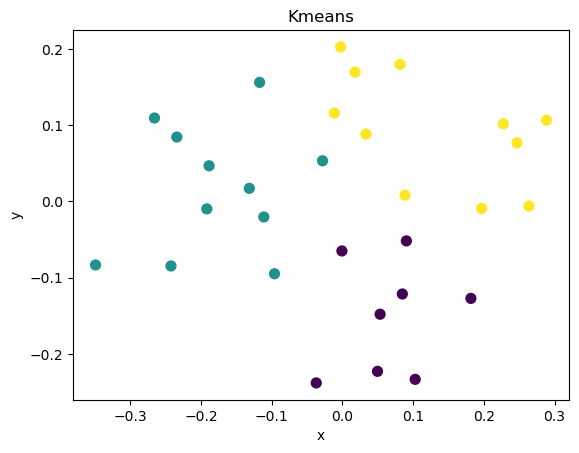

In [6]:
cluster.plot_cluster()